In [1277]:
import pandas as pd
import numpy as np

In [1278]:
# ./export/safety/apartSafetyTrained.csv -> 아파트 정보 및 치안 모델
# ./export/education/final_graded_school_locations.csv 교육 모델 
# ./export/hospital/hospitalOutput.csv 보건 모델


In [1279]:
aparts = pd.read_csv('./export/safety/apartSafetyTrained.csv')
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   k-아파트코드           2762 non-null   object 
 1   k-아파트명            2762 non-null   object 
 2   주소(시군구)           2762 non-null   object 
 3   주소(읍면동)           2762 non-null   object 
 4   lon               2727 non-null   float64
 5   lat               2727 non-null   float64
 6   min_lat           2727 non-null   float64
 7   max_lat           2727 non-null   float64
 8   min_lon           2727 non-null   float64
 9   max_lon           2727 non-null   float64
 10  fireVal           2762 non-null   float64
 11  policeVal         2762 non-null   float64
 12  cctvVal           2762 non-null   float64
 13  cluster           2762 non-null   int64  
 14  DistanceToCenter  2762 non-null   float64
 15  score             2762 non-null   float64
 16  class             2762 non-null   float64


In [1280]:


aparts = aparts[['k-아파트코드','k-아파트명','주소(시군구)','주소(읍면동)',
                 'lon','lat','min_lat','max_lat','min_lon','max_lon',
                 'score','class']]

aparts = aparts.drop_duplicates(subset='k-아파트코드') # 중복 아파트 제거
aparts = aparts.rename(columns={'class': 'safetyClass','score':'safetyScore'})
#안전 등급은 이미 평가가 되어있다.
#safetymodel.ipynb 에서 생성됨.
aparts.head()

,k-아파트코드,k-아파트명,주소(시군구),주소(읍면동),lon,lat,min_lat,max_lat,min_lon,max_lon,safetyScore,safetyClass
0,A15679103,우리유앤미,동작구,흑석동,126.959639,37.500668,37.473668,37.527668,126.932639,126.986639,0.792010,1.0
1,A13876112,송파파인타운13단지,송파구,장지동,127.129179,37.476897,37.449897,37.503897,127.102179,127.156179,0.448997,2.0
2,A13873701,오금현대백조(임대),송파구,오금동,127.128775,37.508906,37.481906,37.535906,127.101775,127.155775,0.769615,1.0
3,A15275101,개봉건영,구로구,개봉동,126.840675,37.501162,37.474162,37.528162,126.813675,126.867675,0.653561,1.0
4,A13991016,월계동원베네스트,노원구,월계동,127.058220,37.631732,37.604732,37.658732,127.031220,127.085220,0.729308,1.0


In [1281]:
aparts.head(5)

,k-아파트코드,k-아파트명,주소(시군구),주소(읍면동),lon,lat,min_lat,max_lat,min_lon,max_lon,safetyScore,safetyClass
0,A15679103,우리유앤미,동작구,흑석동,126.959639,37.500668,37.473668,37.527668,126.932639,126.986639,0.792010,1.0
1,A13876112,송파파인타운13단지,송파구,장지동,127.129179,37.476897,37.449897,37.503897,127.102179,127.156179,0.448997,2.0
2,A13873701,오금현대백조(임대),송파구,오금동,127.128775,37.508906,37.481906,37.535906,127.101775,127.155775,0.769615,1.0
3,A15275101,개봉건영,구로구,개봉동,126.840675,37.501162,37.474162,37.528162,126.813675,126.867675,0.653561,1.0
4,A13991016,월계동원베네스트,노원구,월계동,127.058220,37.631732,37.604732,37.658732,127.031220,127.085220,0.729308,1.0


In [1282]:
educations = pd.read_csv('./export/education/final_graded_school_locations.csv')
educations = educations[['cluster'	,'DistanceToCenter'	,'등급','학교명','조사년도','개방ID','lat','lon','score']]
educations = educations.rename(columns={'등급': 'class'})
educations = educations.dropna(subset=['lat','lon'])
educations.head(5)

,cluster,DistanceToCenter,class,학교명,조사년도,개방ID,lat,lon,score
0,0,0.100041,2.0,가재울고등학교,2019,1018780291,37.574364,126.90953,0.530842
1,0,0.100041,2.0,가재울고등학교,2019,1018780291,37.574364,126.90953,0.530842
2,0,0.100041,2.0,가재울고등학교,2019,1018780291,37.574364,126.90953,0.530842
3,0,0.100041,2.0,가재울고등학교,2019,1018780291,37.574364,126.90953,0.530842
4,0,0.100041,2.0,가재울고등학교,2019,1018780291,37.574364,126.90953,0.530842


In [1283]:
fireCentor = pd.read_csv('./export/safety/filtered_safety_center_data_seoul.csv')
fireCentor = fireCentor.dropna(subset=['lat','lon'])
fireCentor.head()

,센터명,구분,주소,전화번호,FAX,lat,lon
1,삼성119안전센터,1,서울특별시 강남구 테헤란로 629 (삼성동),02-6981-7556,02-539-9008,37.510279,127.066830
2,세곡119안전센터,1,서울특별시 강남구 밤고개로 268 (율현동),02-451-0882,02-451-0883,37.470442,127.107195
3,수서119안전센터,1,서울특별시 강남구 광평로31길 6 (수서동),02-445-9019,02-451-0019,37.484927,127.092842
4,역삼119안전센터,1,서울특별시 강남구 역삼로 236 (역삼동),02-557-0109,02-508-1193,37.497130,127.042447
5,영동119안전센터,1,서울특별시 강남구 도산대로 320 (논현동),02-517-5119,02-542-0119,37.522143,127.036934


In [1284]:
hospitals = pd.read_csv('./export/hospital/hospitalOutput.csv')
hospitals = hospitals[['암호화요양기호','요양기관명','cluster','DistanceToCenter','score','class','lat','lon']]
hospitals =  hospitals.dropna(subset=['lat','lon','score'])

hospitals.head()

,암호화요양기호,요양기관명,cluster,DistanceToCenter,score,class,lat,lon
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,0.146532,1.382311,0.0,37.593776,127.050742
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한양대학교병원,1,0.141688,1.377467,0.0,37.558582,127.045716
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원),1,0.168272,1.404051,0.0,37.587377,127.026249
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,0.153161,1.388940,0.0,37.568868,126.967813
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIy...,학교법인가톨릭학원가톨릭대학교서울성모병원,1,0.199852,1.435631,0.0,37.502394,127.005861


In [1285]:
policeFacilities = pd.read_csv('./export/safety/policeOutput.csv')
policeFacilities =  policeFacilities.dropna(subset=['lat','lon'])

policeFacilities.head()

,구분,주소,이름,lat,lon
0,1,서울특별시 중구 을지로 234,서울중부 을지,37.566473,127.003944
1,1,서울특별시 중구 퇴계로 375-1,서울중부 광희,37.565268,127.013376
2,1,"서울특별시 중구 동호로 5길 15, 약수지구대",서울중부 약수,37.552144,127.012382
3,2,서울특별시 중구 다산로 248,서울중부 신당,37.565044,127.016385
4,2,서울특별시 중구 동호로 261,서울중부 장충,37.558763,127.004802


In [1286]:
# 범위 내의 시설인지 확인하는 함수
def in_range(row, df):
    # 위도와 경도가 모두 범위 내에 있는지 여부를 확인
    in_lat_range = ( row['min_lat'] <= df['lat']) & (  row['max_lat'] >= df['lat'])
 
    in_lon_range = ( row['min_lon'] <= df['lon']) & (  row['max_lon'] >= df['lon'])
   
   

    return (in_lat_range & in_lon_range)

In [1287]:


maskHospital = aparts.apply(lambda row: in_range(row, hospitals), axis=1)
maskEducations = aparts.apply(lambda row: in_range(row, educations), axis=1)
maskPolices = aparts.apply(lambda row: in_range(row, policeFacilities), axis=1)
maskfires = aparts.apply(lambda row: in_range(row, fireCentor), axis=1)
#mask_lat

In [1288]:
print(len(hospitals))

1854


In [1289]:
print(len(maskHospital))
print(len(maskEducations))
print(len(maskPolices))
print(len(maskfires))

print(len(aparts))

2762
2762
2762
2762
2762


In [1290]:
for i in range(len(aparts)):
    #아파트 별 3km 이내의 보건, 교육 데이터를 불러옴 (Aparts 안에 있음)
    print(maskHospital.loc[i].value_counts())
    print(maskEducations.loc[i].value_counts())
    print(maskPolices.loc[i].value_counts())
    print(maskfires.loc[i].value_counts())
    print('------- : '+str(i))

0
False    1772
True       82
Name: count, dtype: int64
0
False    1735
True       75
Name: count, dtype: int64
0
False    228
True      12
Name: count, dtype: int64
0
False    130
True       5
Name: count, dtype: int64
------- : 0
1
False    1784
True       70
Name: count, dtype: int64
1
False    1760
True       50
Name: count, dtype: int64
1
False    233
True       7
Name: count, dtype: int64
1
False    130
True       5
Name: count, dtype: int64
------- : 1
2
False    1683
True      171
Name: count, dtype: int64
2
False    1720
True       90
Name: count, dtype: int64
2
False    229
True      11
Name: count, dtype: int64
2
False    128
True       7
Name: count, dtype: int64
------- : 2
3
False    1792
True       62
Name: count, dtype: int64
3
False    1710
True      100
Name: count, dtype: int64
3
False    232
True       8
Name: count, dtype: int64
3
False    128
True       7
Name: count, dtype: int64
------- : 3
4
False    1766
True       88
Name: count, dtype: int64
4
False    1680


In [1291]:
len(aparts)

2762

In [1292]:
aparts['hospitalScore'] = 0
aparts['educationScore'] = 0

In [1293]:
for i in range(len(aparts)):
    # 병원 점수 계산
    try:
        aparts.loc[i,'hospitalScore']=  hospitals.loc[maskHospital[i],'score'].sum()
    except KeyError:
        print('병원 이내에 없음')    
    
    try:
        aparts.loc[i,'educationScore']=  educations.loc[maskEducations[i],'score'].sum()
    except KeyError:
        print('교육 3km 이내에 없음')    


병원 이내에 없음
병원 이내에 없음


C:\Users\fenpon\AppData\Local\Temp\ipykernel_47572\284312682.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '104.4882996531089' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  aparts.loc[i,'hospitalScore']=  hospitals.loc[maskHospital[i],'score'].sum()
C:\Users\fenpon\AppData\Local\Temp\ipykernel_47572\284312682.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.7154261459333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  aparts.loc[i,'educationScore']=  educations.loc[maskEducations[i],'score'].sum()


병원 이내에 없음
병원 이내에 없음
병원 이내에 없음
병원 이내에 없음
병원 이내에 없음
병원 이내에 없음
병원 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에 없음
병원 이내에 없음
교육 3km 이내에

In [1294]:

from sklearn.preprocessing import MinMaxScaler

orderTags = ['safetyScore','hospitalScore','educationScore']
scaler = MinMaxScaler()
aparts[orderTags]= scaler.fit_transform(aparts[orderTags])

In [1295]:
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   k-아파트코드         2762 non-null   object 
 1   k-아파트명          2762 non-null   object 
 2   주소(시군구)         2762 non-null   object 
 3   주소(읍면동)         2762 non-null   object 
 4   lon             2727 non-null   float64
 5   lat             2727 non-null   float64
 6   min_lat         2727 non-null   float64
 7   max_lat         2727 non-null   float64
 8   min_lon         2727 non-null   float64
 9   max_lon         2727 non-null   float64
 10  safetyScore     2762 non-null   float64
 11  safetyClass     2762 non-null   float64
 12  hospitalScore   2762 non-null   float64
 13  educationScore  2762 non-null   float64
dtypes: float64(10), object(4)
memory usage: 302.2+ KB


array([[0.69528248, 0.4852159 , 0.39215384],
       [0.41337314, 0.01182753, 0.00673645],
       [0.30766927, 0.47387323, 0.41472844]])

C:\Users\fenpon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


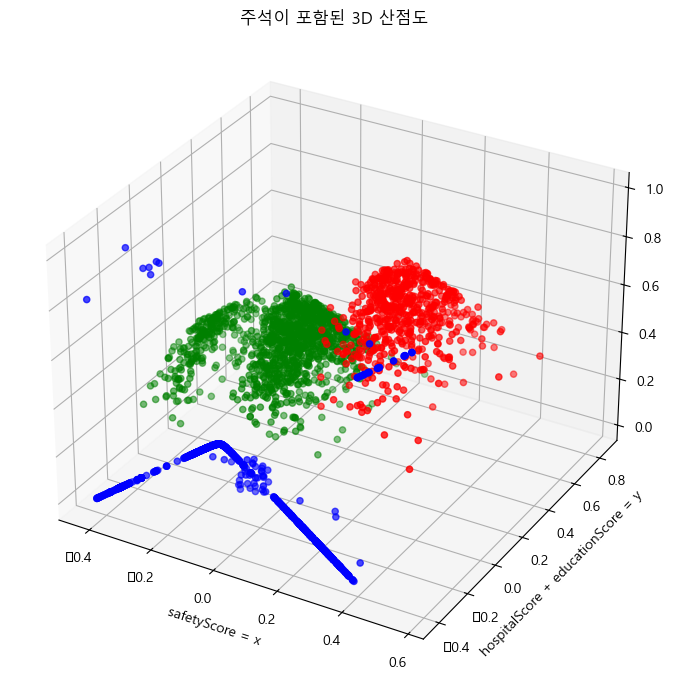

Text(0, 0.5, 'educationScore = x')

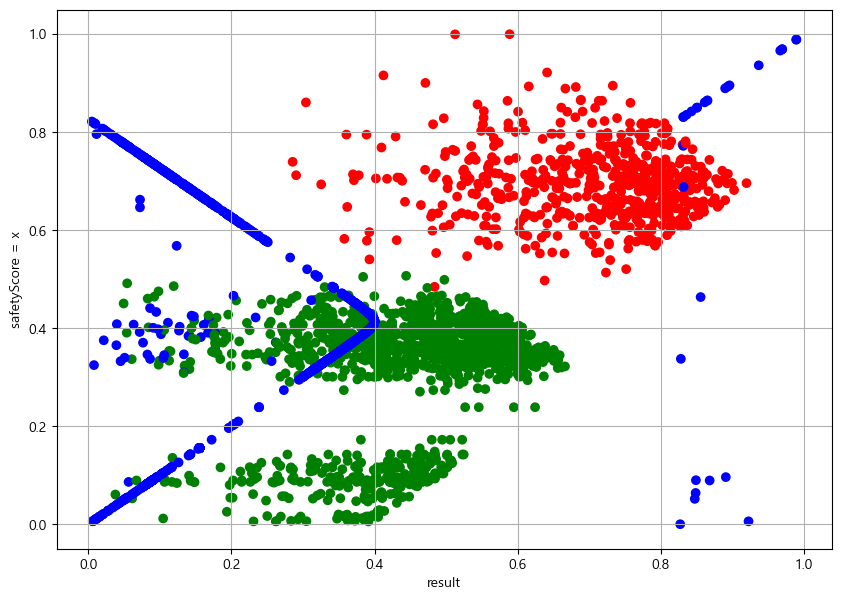

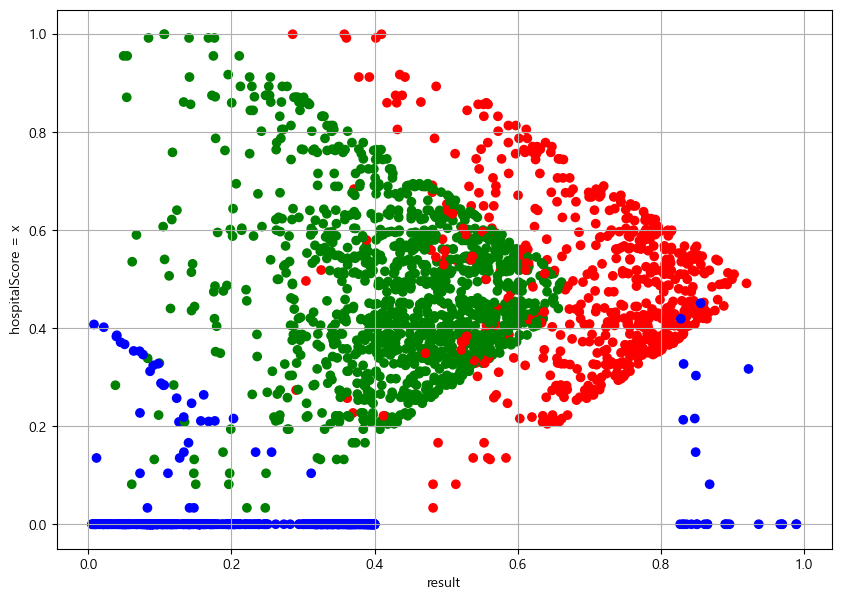

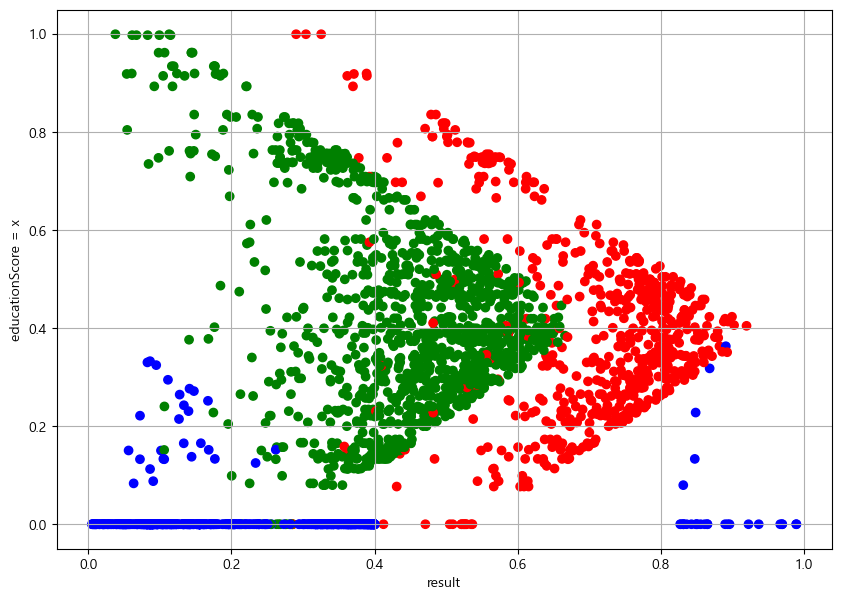

In [1296]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import script.common

classes = ['상','중','하']
colors = ['r','g','b']

kmeans = KMeans(n_clusters=3, random_state=42)  # 3개의 클러스터로 나누기
aparts['cluster'] = kmeans.fit_predict(aparts[orderTags])

centroids = kmeans.cluster_centers_
display(centroids)


colPlot = orderTags
aparts['DistanceToCenter'] = aparts.apply(
    lambda row: np.linalg.norm(row[orderTags] - centroids[row['cluster']]),  # 유클리드 거리 계산
    axis=1
)
originDistance = np.linalg.norm(centroids, axis=1)

aparts.loc[aparts['DistanceToCenter']  < originDistance[aparts['cluster']],'DistanceToCenter'] = aparts['DistanceToCenter'] * -1
aparts.loc[aparts['DistanceToCenter']  >= originDistance[aparts['cluster']],'DistanceToCenter'] = aparts['DistanceToCenter'] * 1


aparts["score"] = aparts['DistanceToCenter'] + originDistance[aparts['cluster']]

#거리가 가장 먼 centorid가 상위 구간이다

# 맨해튼 거리 값이 큰 순서대로 인덱스를 저장
classLevels = np.argsort(originDistance)[::-1]  # 내림차순 정렬

# cluster와 classLevels 비교 후, 특정 열 업데이트
for i, idx in enumerate(classLevels):
     aparts.loc[aparts['cluster'] == idx, 'class'] = int(i)   # 클래스 레벨 할당

color_map = [colors[int(cls) ] for cls in aparts['class']]  # 클래스가 1부터 시작하므로 -1
script.common.look3ND(aparts,colPlot,[],color_map,'') 




# 산점도 그리기
plt.figure(figsize=(10, 7))
plt.grid()

plt.scatter(  aparts["score"], aparts[colPlot[0]], c=color_map, marker='o')
plt.xlabel('result')
plt.ylabel(colPlot[0] + " = x" )

plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(  aparts["score"], aparts[colPlot[1]], c=color_map, marker='o')
plt.xlabel('result')
plt.ylabel(colPlot[1] + " = x" )

plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(  aparts["score"], aparts[colPlot[2]], c=color_map, marker='o')
plt.xlabel('result')
plt.ylabel(colPlot[2] + " = x" )


In [1297]:


aparts.to_csv('./export/MaintrainDatas.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외

